In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
!gdown 15DIQuwltgOBa-MuIw_BgaZlkSVZDdyNb
yz2 = pd.read_csv('/content/yz2.csv')

from IPython.display import display, HTML
display(HTML(yz2.to_html()))

Downloading...
From: https://drive.google.com/uc?id=15DIQuwltgOBa-MuIw_BgaZlkSVZDdyNb
To: /content/yz2.csv
100% 24.4k/24.4k [00:00<00:00, 38.0MB/s]


,fiyat,m2_brut,m2_net,oda_sayisi,bina_yasi,bulundugu_kat,kat_sayisi,isitma,balkon,banyo_sayısı,asansor,otopark,site_icerisinde,aidat,tapu_durumu,mahalle,daire_durum
0,3300000,75.0,65.0,2+1,31.0,3,3.0,Doğalgaz,Var,1.0,Yok,Yok,Hayır,100.0,Kat Mülkiyetli,Mimar Sinan,ikinci el
1,5500000,70.0,67.0,2+1,21.0,1,5.0,Doğalgaz,Yok,2.0,Yok,Yok,Hayır,100.0,Kat Mülkiyetli,Mimar Sinan,ikinci el
2,4500000,80.0,75.0,2+1,26.0,4,4.0,Doğalgaz,Var,1.0,Yok,Yok,Hayır,NaN,Hisseli Tapu,Mimar Sinan,ikinci el
3,5350000,87.0,80.0,2+1,0.0,-1,6.0,Yerden Isıtmalı,Var,1.0,Var,Yok,Hayır,NaN,Kat İrtifaklı,Mimar Sinan,sıfır
4,12800000,120.0,105.0,2+1,3.0,1,10.0,Doğalgaz,Var,2.0,Var,Var,Evet,NaN,Kat Mülkiyetli,Mimar Sinan,ikinci el
5,10500000,140.0,130.0,3+1,0.0,5,5.0,Doğalgaz,Var,2.0,Var,Yok,Hayır,NaN,Kat Mülkiyetli,Mimar Sinan,sıfır
6,10950000,154.0,120.0,3+2,0.0,5,5.0,Doğalgaz,NaN,2.0,Var,Var,Hayır,NaN,Kat Mülkiyetli,Mimar Sinan,sıfır
7,10500000,160.0,130.0,3+2,0.0,5,5.0,Doğalgaz,Var,2.0,Var,Var,Hayır,NaN,Kat Mülkiyetli,Mimar Sinan,sıfır
8,13500000,140.0,122.0,3+1,0.0,3,5.0,Doğalgaz,Var,1.0,Var,Yok,Hayır,NaN,Kat Mülkiyetli,Mimar Sinan,sıfır
9,4750000,70.0,65.0,2+1,0.0,-2,5.0,Doğalgaz,Var,1.0,Yok,Yok,Hayır,NaN,Kat Mülkiyetli,Mimar Sinan,sıfır


In [ ]:
row_counts = yz2.count(axis=1)

rows_to_drop = row_counts[row_counts < 5].index
print(rows_to_drop)
yz2.drop(rows_to_drop, axis=0, inplace=True)

Index([226], dtype='int64')


In [ ]:
yz2.isnull().sum()*100/yz2.shape[0]

,0
fiyat,0.000000
m2_brut,0.000000
m2_net,0.401606
oda_sayisi,0.000000
bina_yasi,0.000000
bulundugu_kat,0.000000
kat_sayisi,0.000000
isitma,1.204819
balkon,0.803213
banyo_sayısı,0.000000


In [ ]:
yz2.drop('aidat', axis=1, inplace=True)

In [ ]:
mode_value = yz2['m2_net'].mode()[0]
print(mode_value)
yz2['m2_net'].fillna(mode_value, inplace=True)

80.0


In [ ]:
yz2.isnull().sum()*100/yz2.shape[0]

,0
fiyat,0.000000
m2_brut,0.000000
m2_net,0.000000
oda_sayisi,0.000000
bina_yasi,0.000000
bulundugu_kat,0.000000
kat_sayisi,0.000000
isitma,1.204819
balkon,0.803213
banyo_sayısı,0.000000


In [ ]:
yz2[['oda_sayisi1', 'salon_sayisi']] = yz2['oda_sayisi'].str.split('+', expand=True)

# Yeni sütunları tam sayıya dönüştürme
yz2['oda_sayisi1' ] = yz2['oda_sayisi1'].astype(float)
yz2['salon_sayisi'] = yz2['salon_sayisi'].astype(float)
yz2.drop('oda_sayisi', axis=1, inplace=True)

In [ ]:
print(yz2['bulundugu_kat'].unique())

['3' '1' '4' '-1' '5' '-2' '2' '0' '6' '14' '17' 'Bahçe Katı' '7' 'Köşk']


In [ ]:
yz2['bulundugu_kat'].replace('Bahçe Katı','0', inplace=True)
print(yz2['bulundugu_kat'].unique())

['3' '1' '4' '-1' '5' '-2' '2' '0' '6' '14' '17' '7' 'Köşk']


In [ ]:
index_to_drop = yz2[yz2['bulundugu_kat'] == 'Köşk'].index
yz2.drop(index_to_drop, inplace=True)

In [ ]:
mode_value_isitma = yz2['isitma'].mode()[0]
print(mode_value_isitma)

Doğalgaz


In [ ]:
yz2['isitma'].fillna(mode_value_isitma, inplace=True)
yz2.isnull().sum()*100/yz2.shape[0]

,0
fiyat,0.000000
m2_brut,0.000000
m2_net,0.000000
bina_yasi,0.000000
bulundugu_kat,0.000000
kat_sayisi,0.000000
isitma,0.000000
balkon,0.806452
banyo_sayısı,0.000000
asansor,0.000000


In [ ]:
mode_value_balkon = yz2['balkon'].mode()[0]
print(mode_value_balkon)

Var


In [ ]:
yz2['balkon'].fillna(mode_value_balkon, inplace=True)
yz2.isnull().sum()*100/yz2.shape[0]

,0
fiyat,0.0
m2_brut,0.0
m2_net,0.0
bina_yasi,0.0
bulundugu_kat,0.0
kat_sayisi,0.0
isitma,0.0
balkon,0.0
banyo_sayısı,0.0
asansor,0.0


In [ ]:
print(yz2['otopark'].unique())

['Yok' 'Var' 'yok' 'var']


In [ ]:
yz2['otopark'] = yz2['otopark'].str.capitalize()
print(yz2['otopark'].unique())

['Yok' 'Var']


In [ ]:
print(yz2['daire_durum'].unique())

['ikinci el' 'sıfır']


In [ ]:
print(yz2['mahalle'].unique())

['Mimar Sinan' 'Acıbadem' 'İcadiye' 'Çengelköy' 'Sultantepe Mah.']


In [ ]:
yz2['mahalle'].replace('Sultantepe Mah.','Sultantepe', inplace=True)
print(yz2['mahalle'].unique())

['Mimar Sinan' 'Acıbadem' 'İcadiye' 'Çengelköy' 'Sultantepe']


In [ ]:
print(yz2['tapu_durumu'].unique())

['Kat Mülkiyetli' 'Hisseli Tapu' 'Kat İrtifaklı' 'Arsa Tapulu'
 'Müstakil Tapulu' 'Kooperatif Hisseli Tapu' 'Kat Mülkiyetli ']


In [ ]:
yz2['tapu_durumu'].replace('Kat Mülkiyetli ','Kat Mülkiyetli', inplace=True)
print(yz2['tapu_durumu'].unique())

['Kat Mülkiyetli' 'Hisseli Tapu' 'Kat İrtifaklı' 'Arsa Tapulu'
 'Müstakil Tapulu' 'Kooperatif Hisseli Tapu']


In [ ]:
print(yz2['site_icerisinde'].unique())

['Hayır' 'Evet']


In [ ]:
print(yz2['asansor'].unique())

['Yok' 'Var']


In [ ]:
print(yz2['balkon'].unique())

['Var' 'Yok']


In [ ]:
print(yz2['isitma'].unique())

['Doğalgaz' 'Yerden Isıtmalı' 'Yok' 'Yerden Isıtma']


In [ ]:
yz2['isitma'].replace('Yerden Isıtma','Yerden Isıtmalı', inplace=True)
print(yz2['isitma'].unique())

['Doğalgaz' 'Yerden Isıtmalı' 'Yok']


In [ ]:
yz2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 249
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fiyat            248 non-null    int64  
 1   m2_brut          248 non-null    float64
 2   m2_net           248 non-null    float64
 3   bina_yasi        248 non-null    float64
 4   bulundugu_kat    248 non-null    object 
 5   kat_sayisi       248 non-null    float64
 6   isitma           248 non-null    object 
 7   balkon           248 non-null    object 
 8   banyo_sayısı     248 non-null    float64
 9   asansor          248 non-null    object 
 10  otopark          248 non-null    object 
 11  site_icerisinde  248 non-null    object 
 12  tapu_durumu      248 non-null    object 
 13  mahalle          248 non-null    object 
 14  daire_durum      248 non-null    object 
 15  oda_sayisi1      248 non-null    float64
 16  salon_sayisi     248 non-null    float64
dtypes: float64(7), int64(

In [ ]:
yz2['bulundugu_kat'] = pd.to_numeric(yz2['bulundugu_kat'], errors='raise')
yz2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 0 to 249
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fiyat            248 non-null    int64  
 1   m2_brut          248 non-null    float64
 2   m2_net           248 non-null    float64
 3   bina_yasi        248 non-null    float64
 4   bulundugu_kat    248 non-null    int64  
 5   kat_sayisi       248 non-null    float64
 6   isitma           248 non-null    object 
 7   balkon           248 non-null    object 
 8   banyo_sayısı     248 non-null    float64
 9   asansor          248 non-null    object 
 10  otopark          248 non-null    object 
 11  site_icerisinde  248 non-null    object 
 12  tapu_durumu      248 non-null    object 
 13  mahalle          248 non-null    object 
 14  daire_durum      248 non-null    object 
 15  oda_sayisi1      248 non-null    float64
 16  salon_sayisi     248 non-null    float64
dtypes: float64(7), int64(

In [ ]:
yz2['isitma'].value_counts()

,count
isitma,
Doğalgaz,225
Yerden Isıtmalı,22
Yok,1


In [ ]:
yz2['tapu_durumu'].value_counts()

,count
tapu_durumu,
Kat Mülkiyetli,173
Kat İrtifaklı,57
Hisseli Tapu,7
Arsa Tapulu,6
Kooperatif Hisseli Tapu,3
Müstakil Tapulu,2


In [ ]:
index_tapu = yz2[yz2['tapu_durumu'].isin(['Hisseli Tapu', 'Arsa Tapulu', 'Kooperatif Hisseli Tapu','Müstakil Tapulu'])].index
yz2.drop(index_tapu, inplace=True)

In [ ]:
yz2['tapu_durumu'] = yz2['tapu_durumu'].replace({'Kat Mülkiyetli': 1, 'Kat İrtifaklı': 0})
yz2['tapu_durumu'].value_counts()

,count
tapu_durumu,
1,173
0,57


In [ ]:
indexes_to_isitma = yz2[yz2['isitma'] == 'Yok'].index
yz2.drop(indexes_to_isitma, inplace=True)
yz2['isitma'].value_counts()

,count
isitma,
Doğalgaz,207
Yerden Isıtmalı,22


In [ ]:
yz2['isitma'] = yz2['isitma'].replace({'Yerden Isıtmalı': 1, 'Doğalgaz': 0})
yz2['isitma'].value_counts()

,count
isitma,
0,207
1,22


In [ ]:
yz2 = pd.get_dummies(yz2, columns=['mahalle'], drop_first=False, dtype=int)
print(yz2)

        fiyat  m2_brut  m2_net  bina_yasi  bulundugu_kat  kat_sayisi  isitma  \
0     3300000     75.0    65.0       31.0              3         3.0       0   
1     5500000     70.0    67.0       21.0              1         5.0       0   
3     5350000     87.0    80.0        0.0             -1         6.0       1   
4    12800000    120.0   105.0        3.0              1        10.0       0   
5    10500000    140.0   130.0        0.0              5         5.0       0   
..        ...      ...     ...        ...            ...         ...     ...   
245  45000000    345.0   245.0        0.0              6         6.0       0   
246   2850000     80.0    70.0       31.0              0         5.0       0   
247  11000000    100.0    95.0        0.0             -1         4.0       0   
248  45000000    307.0   239.0        0.0              5         5.0       0   
249  11950000    158.0    99.0        0.0              3         5.0       0   

    balkon  banyo_sayısı asansor  ... s

In [ ]:
display(HTML(yz2.to_html()))

,fiyat,m2_brut,m2_net,bina_yasi,bulundugu_kat,kat_sayisi,isitma,balkon,banyo_sayısı,asansor,otopark,site_icerisinde,tapu_durumu,daire_durum,oda_sayisi1,salon_sayisi,mahalle_Acıbadem,mahalle_Mimar Sinan,mahalle_Sultantepe,mahalle_Çengelköy,mahalle_İcadiye
0,3300000,75.0,65.0,31.0,3,3.0,0,Var,1.0,Yok,Yok,Hayır,1,ikinci el,2.0,1.0,0,1,0,0,0
1,5500000,70.0,67.0,21.0,1,5.0,0,Yok,2.0,Yok,Yok,Hayır,1,ikinci el,2.0,1.0,0,1,0,0,0
3,5350000,87.0,80.0,0.0,-1,6.0,1,Var,1.0,Var,Yok,Hayır,0,sıfır,2.0,1.0,0,1,0,0,0
4,12800000,120.0,105.0,3.0,1,10.0,0,Var,2.0,Var,Var,Evet,1,ikinci el,2.0,1.0,0,1,0,0,0
5,10500000,140.0,130.0,0.0,5,5.0,0,Var,2.0,Var,Yok,Hayır,1,sıfır,3.0,1.0,0,1,0,0,0
6,10950000,154.0,120.0,0.0,5,5.0,0,Var,2.0,Var,Var,Hayır,1,sıfır,3.0,2.0,0,1,0,0,0
7,10500000,160.0,130.0,0.0,5,5.0,0,Var,2.0,Var,Var,Hayır,1,sıfır,3.0,2.0,0,1,0,0,0
8,13500000,140.0,122.0,0.0,3,5.0,0,Var,1.0,Var,Yok,Hayır,1,sıfır,3.0,1.0,0,1,0,0,0
9,4750000,70.0,65.0,0.0,-2,5.0,0,Var,1.0,Yok,Yok,Hayır,1,sıfır,2.0,1.0,0,1,0,0,0
10,11500000,150.0,125.0,0.0,5,5.0,0,Var,2.0,Var,Yok,Hayır,1,sıfır,4.0,1.0,0,1,0,0,0


In [ ]:
yz2['balkon'] = yz2['balkon'].replace({'Var': 1, 'Yok': 0})
yz2['balkon'].value_counts()

,count
balkon,
1,199
0,30


In [ ]:
yz2['asansor'] = yz2['asansor'].replace({'Var': 1, 'Yok': 0})
yz2['asansor'].value_counts()

,count
asansor,
1,148
0,81


In [ ]:
yz2['otopark'] = yz2['otopark'].replace({'Var': 1, 'Yok': 0})
yz2['otopark'].value_counts()

,count
otopark,
1,121
0,108


In [ ]:
yz2['site_icerisinde'] = yz2['site_icerisinde'].replace({'Evet': 1, 'Hayır': 0})
yz2['site_icerisinde'].value_counts()

,count
site_icerisinde,
0,198
1,31


In [ ]:
yz2['daire_durum'].value_counts()

,count
daire_durum,
sıfır,124
ikinci el,105


In [ ]:
yz2['daire_durum'] = yz2['daire_durum'].replace({'sıfır': 1, 'ikinci el': 0})
yz2['daire_durum'].value_counts()

,count
daire_durum,
1,124
0,105


In [ ]:
display(HTML(yz2.to_html()))

,fiyat,m2_brut,m2_net,bina_yasi,bulundugu_kat,kat_sayisi,isitma,balkon,banyo_sayısı,asansor,otopark,site_icerisinde,tapu_durumu,daire_durum,oda_sayisi1,salon_sayisi,mahalle_Acıbadem,mahalle_Mimar Sinan,mahalle_Sultantepe,mahalle_Çengelköy,mahalle_İcadiye
0,3300000,75.0,65.0,31.0,3,3.0,0,1,1.0,0,0,0,1,0,2.0,1.0,0,1,0,0,0
1,5500000,70.0,67.0,21.0,1,5.0,0,0,2.0,0,0,0,1,0,2.0,1.0,0,1,0,0,0
3,5350000,87.0,80.0,0.0,-1,6.0,1,1,1.0,1,0,0,0,1,2.0,1.0,0,1,0,0,0
4,12800000,120.0,105.0,3.0,1,10.0,0,1,2.0,1,1,1,1,0,2.0,1.0,0,1,0,0,0
5,10500000,140.0,130.0,0.0,5,5.0,0,1,2.0,1,0,0,1,1,3.0,1.0,0,1,0,0,0
6,10950000,154.0,120.0,0.0,5,5.0,0,1,2.0,1,1,0,1,1,3.0,2.0,0,1,0,0,0
7,10500000,160.0,130.0,0.0,5,5.0,0,1,2.0,1,1,0,1,1,3.0,2.0,0,1,0,0,0
8,13500000,140.0,122.0,0.0,3,5.0,0,1,1.0,1,0,0,1,1,3.0,1.0,0,1,0,0,0
9,4750000,70.0,65.0,0.0,-2,5.0,0,1,1.0,0,0,0,1,1,2.0,1.0,0,1,0,0,0
10,11500000,150.0,125.0,0.0,5,5.0,0,1,2.0,1,0,0,1,1,4.0,1.0,0,1,0,0,0


In [ ]:
yz2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 249
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fiyat                229 non-null    int64  
 1   m2_brut              229 non-null    float64
 2   m2_net               229 non-null    float64
 3   bina_yasi            229 non-null    float64
 4   bulundugu_kat        229 non-null    int64  
 5   kat_sayisi           229 non-null    float64
 6   isitma               229 non-null    int64  
 7   balkon               229 non-null    int64  
 8   banyo_sayısı         229 non-null    float64
 9   asansor              229 non-null    int64  
 10  otopark              229 non-null    int64  
 11  site_icerisinde      229 non-null    int64  
 12  tapu_durumu          229 non-null    int64  
 13  daire_durum          229 non-null    int64  
 14  oda_sayisi1          229 non-null    float64
 15  salon_sayisi         229 non-null    float64


In [ ]:
yz2.to_csv('yztemiz.csv', index=False)

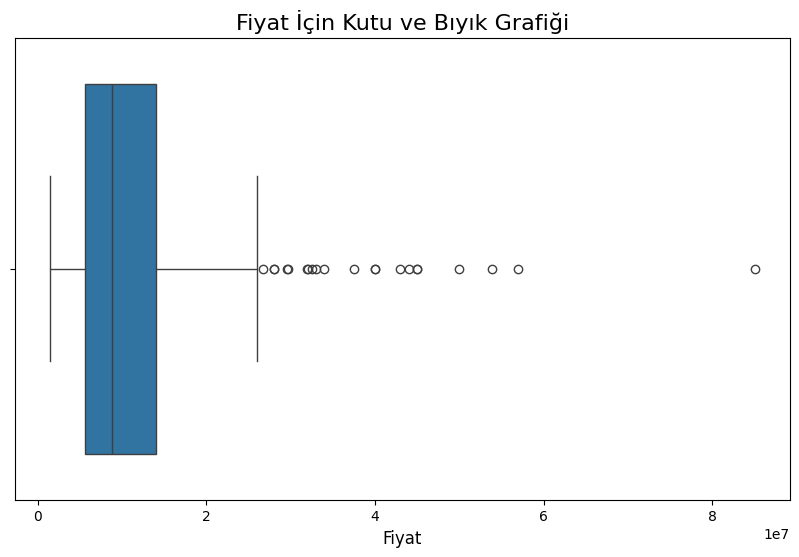

In [ ]:
# 'fiyat' sütunu için kutu ve bıyık grafiği oluşturma
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2['fiyat'])

# Başlık ve etiketler
plt.title('Fiyat İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Fiyat', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
# IQR hesaplama
Q1 = yz2['fiyat'].quantile(0.25)
Q3 = yz2['fiyat'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yz2_cleaned = yz2[(yz2['fiyat'] >= lower_bound) & (yz2['fiyat'] <= upper_bound)]

print(yz2_cleaned['fiyat'].describe())

count    2.080000e+02
mean     9.440043e+06
std      5.273109e+06
min      1.485000e+06
25%      5.387500e+06
50%      7.750000e+06
75%      1.282500e+07
max      2.600000e+07
Name: fiyat, dtype: float64


In [ ]:
display(HTML(yz2_cleaned.to_html()))

,fiyat,m2_brut,m2_net,bina_yasi,bulundugu_kat,kat_sayisi,isitma,balkon,banyo_sayısı,asansor,otopark,site_icerisinde,tapu_durumu,daire_durum,oda_sayisi1,salon_sayisi,mahalle_Acıbadem,mahalle_Mimar Sinan,mahalle_Sultantepe,mahalle_Çengelköy,mahalle_İcadiye
0,3300000,75.0,65.0,31.0,3,3.0,0,1,1.0,0,0,0,1,0,2.0,1.0,0,1,0,0,0
1,5500000,70.0,67.0,21.0,1,5.0,0,0,2.0,0,0,0,1,0,2.0,1.0,0,1,0,0,0
3,5350000,87.0,80.0,0.0,-1,6.0,1,1,1.0,1,0,0,0,1,2.0,1.0,0,1,0,0,0
4,12800000,120.0,105.0,3.0,1,10.0,0,1,2.0,1,1,1,1,0,2.0,1.0,0,1,0,0,0
5,10500000,140.0,130.0,0.0,5,5.0,0,1,2.0,1,0,0,1,1,3.0,1.0,0,1,0,0,0
6,10950000,154.0,120.0,0.0,5,5.0,0,1,2.0,1,1,0,1,1,3.0,2.0,0,1,0,0,0
7,10500000,160.0,130.0,0.0,5,5.0,0,1,2.0,1,1,0,1,1,3.0,2.0,0,1,0,0,0
8,13500000,140.0,122.0,0.0,3,5.0,0,1,1.0,1,0,0,1,1,3.0,1.0,0,1,0,0,0
9,4750000,70.0,65.0,0.0,-2,5.0,0,1,1.0,0,0,0,1,1,2.0,1.0,0,1,0,0,0
10,11500000,150.0,125.0,0.0,5,5.0,0,1,2.0,1,0,0,1,1,4.0,1.0,0,1,0,0,0


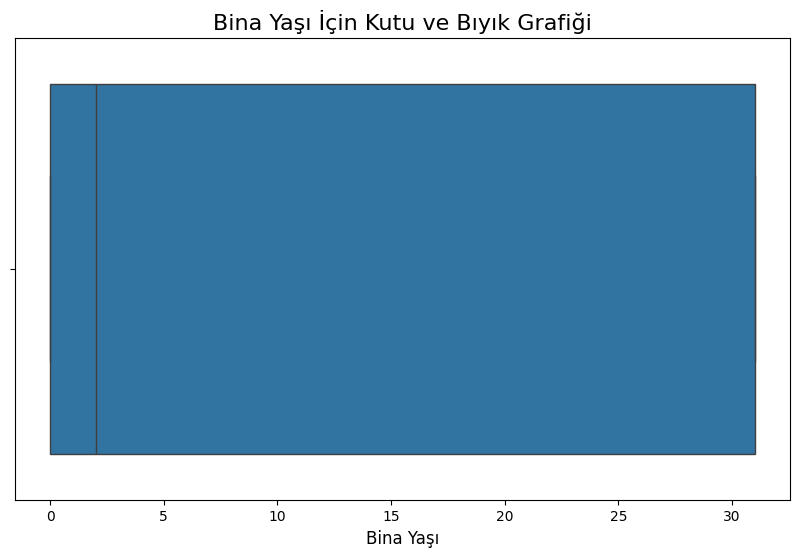

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned['bina_yasi'])

# Başlık ve etiketler
plt.title('Bina Yaşı İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Bina Yaşı', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
# IQR hesaplama
Q1 = yz2_cleaned['bina_yasi'].quantile(0.25)
Q3 = yz2_cleaned['bina_yasi'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yz2_cleaned1 = yz2_cleaned[(yz2['bina_yasi'] >= lower_bound) & (yz2_cleaned['bina_yasi'] <= upper_bound)]

print(yz2_cleaned1['bina_yasi'].describe())

count    208.000000
mean      12.120192
std       13.755279
min        0.000000
25%        0.000000
50%        2.000000
75%       31.000000
max       31.000000
Name: bina_yasi, dtype: float64


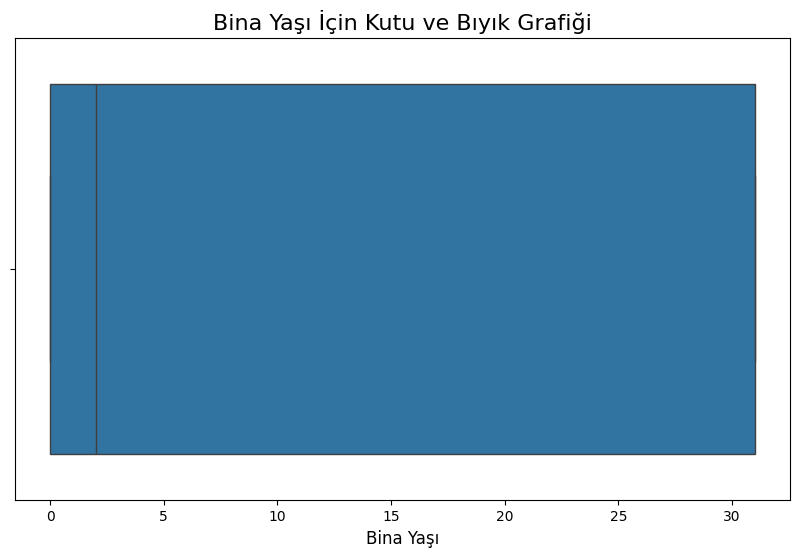

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned1['bina_yasi'])

# Başlık ve etiketler
plt.title('Bina Yaşı İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Bina Yaşı', fontsize=12)

# Grafiği göster
plt.show()

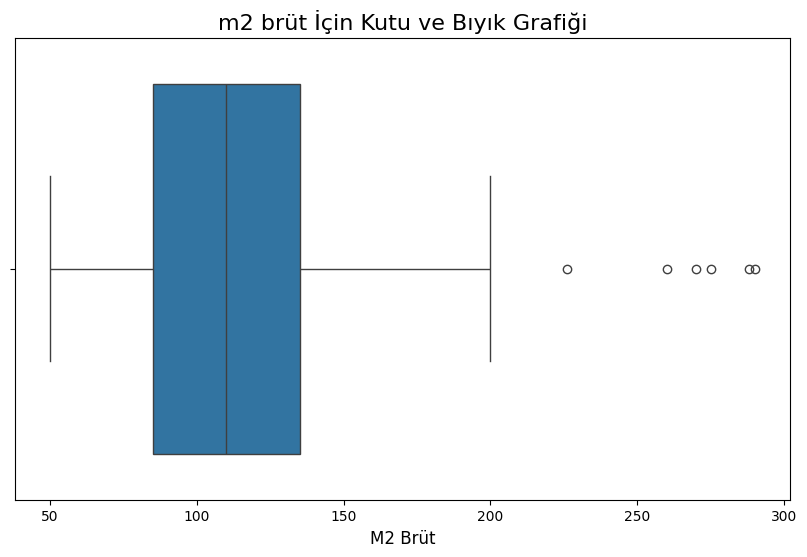

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned1['m2_brut'])

# Başlık ve etiketler
plt.title('m2 brüt İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('M2 Brüt', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
# IQR hesaplama
Q1 = yz2_cleaned1['m2_brut'].quantile(0.25)
Q3 = yz2_cleaned1['m2_brut'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yz2_cleaned2 = yz2_cleaned1[(yz2_cleaned1['m2_brut'] >= lower_bound) & (yz2_cleaned1['m2_brut'] <= upper_bound)]

print(yz2_cleaned2['m2_brut'].describe())

count    202.000000
mean     111.094059
std       32.794036
min       50.000000
25%       85.000000
50%      107.000000
75%      130.000000
max      200.000000
Name: m2_brut, dtype: float64


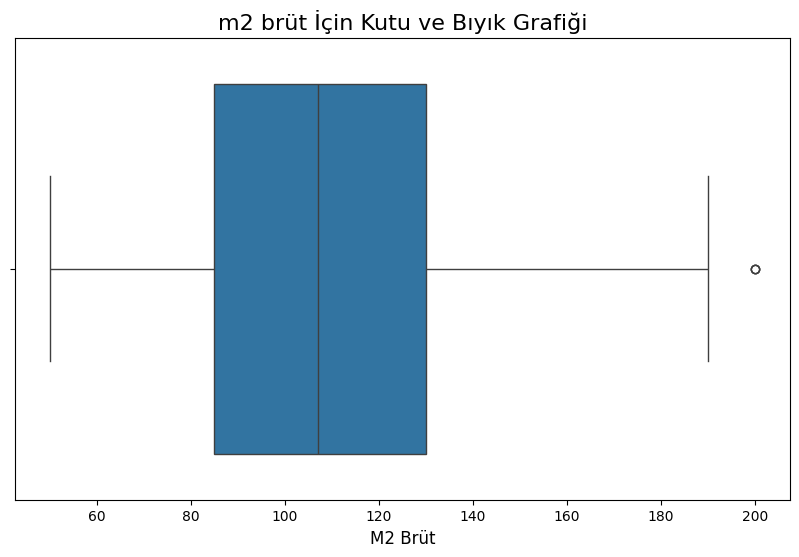

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned2['m2_brut'])

# Başlık ve etiketler
plt.title('m2 brüt İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('M2 Brüt', fontsize=12)

# Grafiği göster
plt.show()

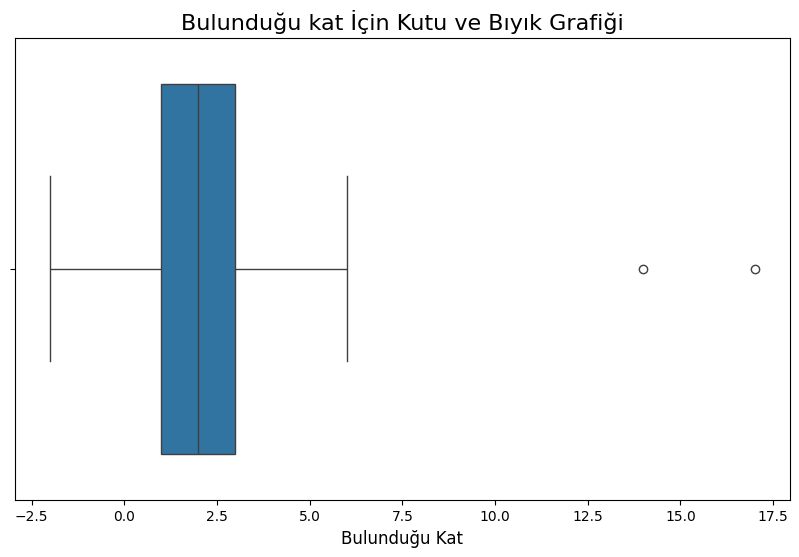

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned2['bulundugu_kat'])

# Başlık ve etiketler
plt.title('Bulunduğu kat İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Bulunduğu Kat', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
# IQR hesaplama
Q1 = yz2_cleaned2['bulundugu_kat'].quantile(0.25)
Q3 = yz2_cleaned2['bulundugu_kat'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yz2_cleaned3 = yz2_cleaned2[(yz2_cleaned2['bulundugu_kat'] >= lower_bound) & (yz2_cleaned2['bulundugu_kat'] <= upper_bound)]

print(yz2_cleaned3['bulundugu_kat'].describe())

count    200.000000
mean       1.900000
std        1.793343
min       -2.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: bulundugu_kat, dtype: float64


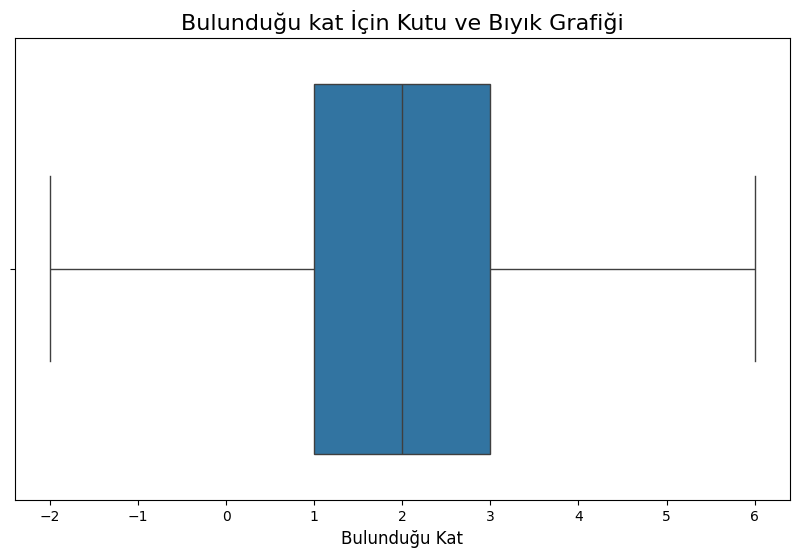

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned3['bulundugu_kat'])

# Başlık ve etiketler
plt.title('Bulunduğu kat İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Bulunduğu Kat', fontsize=12)

# Grafiği göster
plt.show()

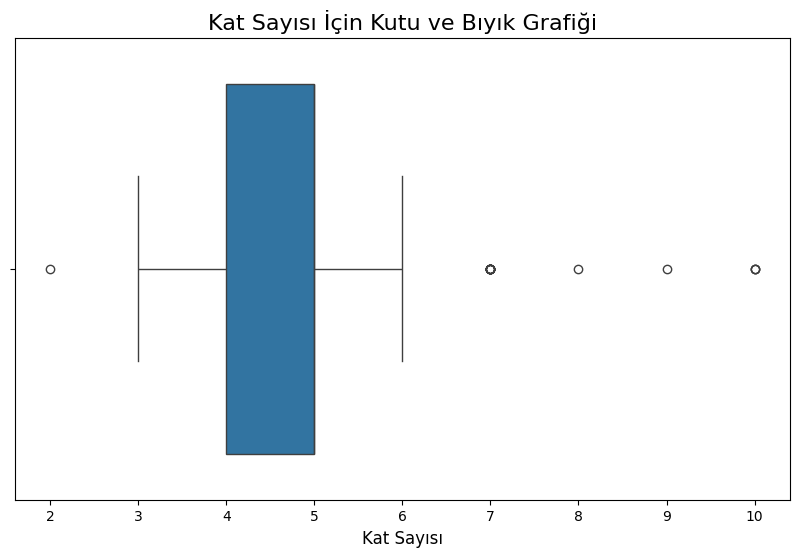

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned3['kat_sayisi'])

# Başlık ve etiketler
plt.title('Kat Sayısı İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Kat Sayısı', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
# IQR hesaplama
Q1 = yz2_cleaned3['kat_sayisi'].quantile(0.25)
Q3 = yz2_cleaned3['kat_sayisi'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yz2_cleaned4 = yz2_cleaned3[(yz2_cleaned3['kat_sayisi'] >= lower_bound) & (yz2_cleaned3['kat_sayisi'] <= upper_bound)]

print(yz2_cleaned4['kat_sayisi'].describe())

count    182.000000
mean       4.615385
std        0.747286
min        3.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        6.000000
Name: kat_sayisi, dtype: float64


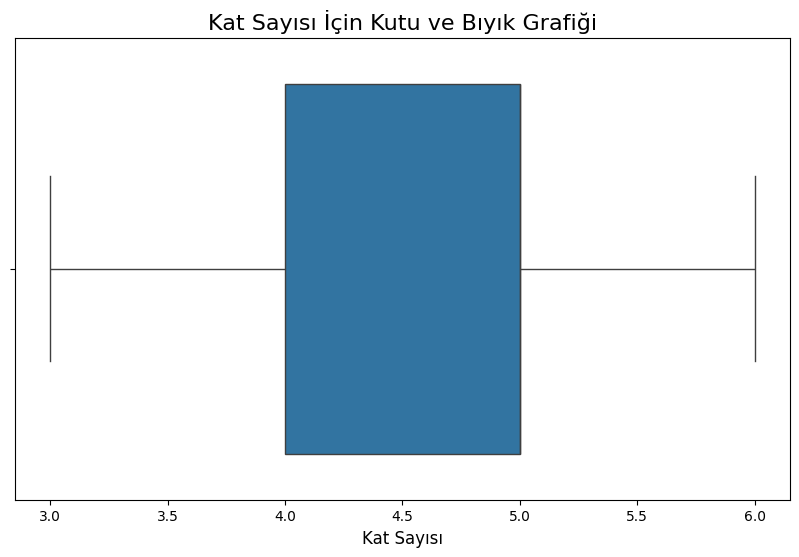

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned4['kat_sayisi'])

# Başlık ve etiketler
plt.title('Kat Sayısı İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Kat Sayısı', fontsize=12)

# Grafiği göster
plt.show()

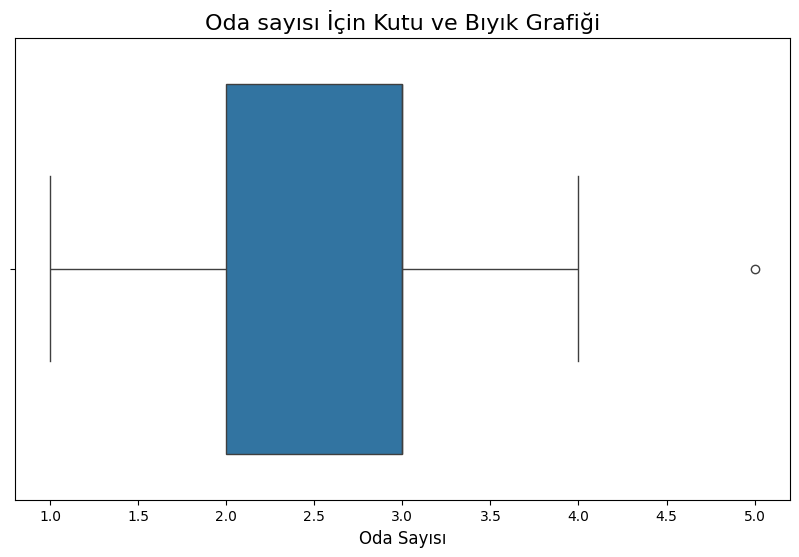

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned4['oda_sayisi1'])

# Başlık ve etiketler
plt.title('Oda sayısı İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Oda Sayısı', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
# IQR hesaplama
Q1 = yz2_cleaned4['oda_sayisi1'].quantile(0.25)
Q3 = yz2_cleaned4['oda_sayisi1'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yz2_cleaned5 = yz2_cleaned4[(yz2_cleaned4['oda_sayisi1'] >= lower_bound) & (yz2_cleaned4['oda_sayisi1'] <= upper_bound)]

print(yz2_cleaned5['oda_sayisi1'].describe())

count    181.000000
mean       2.569061
std        0.768790
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: oda_sayisi1, dtype: float64


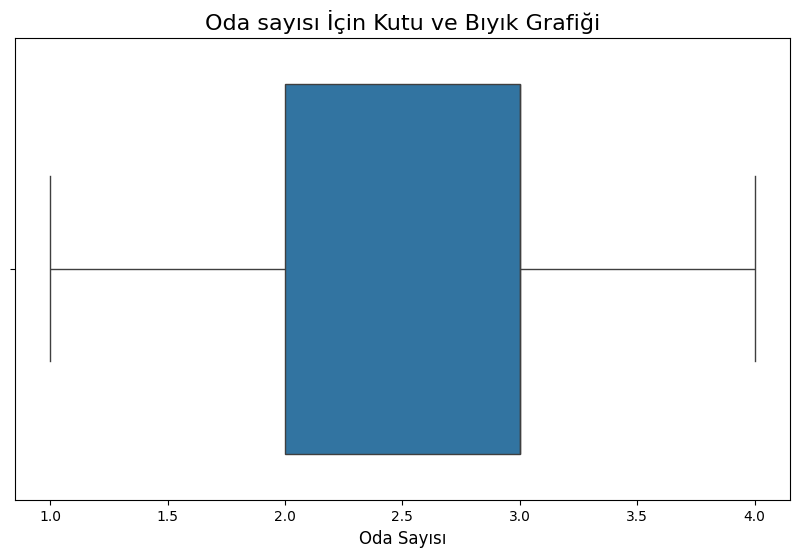

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned5['oda_sayisi1'])

# Başlık ve etiketler
plt.title('Oda sayısı İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('Oda Sayısı', fontsize=12)

# Grafiği göster
plt.show()

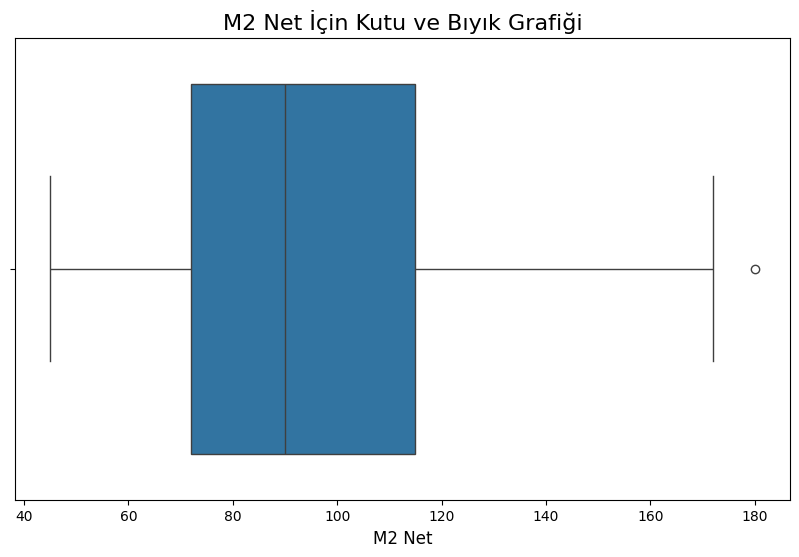

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned5['m2_net'])

# Başlık ve etiketler
plt.title('M2 Net İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('M2 Net', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
# IQR hesaplama
Q1 = yz2_cleaned5['m2_net'].quantile(0.25)
Q3 = yz2_cleaned5['m2_net'].quantile(0.75)
IQR = Q3 - Q1

# Aykırı değerlerin belirlenmesi
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

yz2_cleaned6 = yz2_cleaned5[(yz2_cleaned5['m2_net'] >= lower_bound) & (yz2_cleaned5['m2_net'] <= upper_bound)]

print(yz2_cleaned6['m2_net'].describe())

count    180.000000
mean      93.966667
std       27.097775
min       45.000000
25%       71.750000
50%       90.000000
75%      115.000000
max      172.000000
Name: m2_net, dtype: float64


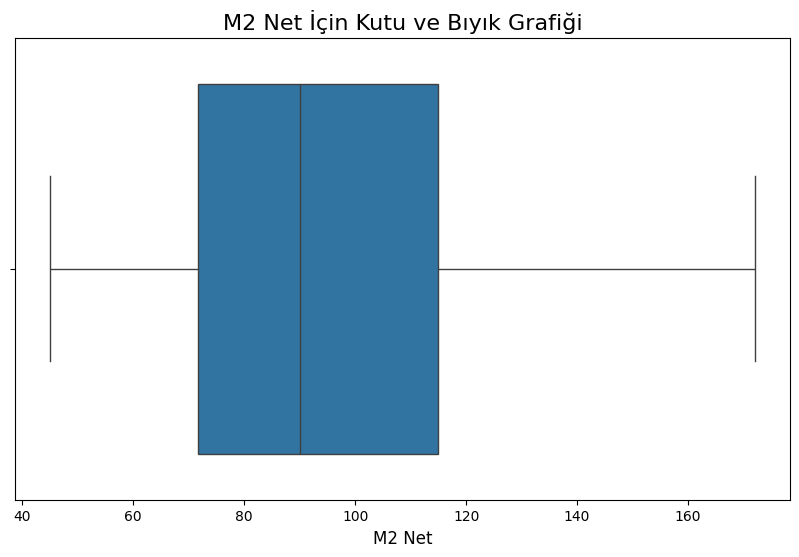

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=yz2_cleaned6['m2_net'])

# Başlık ve etiketler
plt.title('M2 Net İçin Kutu ve Bıyık Grafiği', fontsize=16)
plt.xlabel('M2 Net', fontsize=12)

# Grafiği göster
plt.show()

In [ ]:
yz2_cleaned6.to_csv('yztemiz2.csv', index=False)

In [ ]:
yz2_cleaned6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 249
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fiyat                180 non-null    int64  
 1   m2_brut              180 non-null    float64
 2   m2_net               180 non-null    float64
 3   bina_yasi            180 non-null    float64
 4   bulundugu_kat        180 non-null    int64  
 5   kat_sayisi           180 non-null    float64
 6   isitma               180 non-null    int64  
 7   balkon               180 non-null    int64  
 8   banyo_sayısı         180 non-null    float64
 9   asansor              180 non-null    int64  
 10  otopark              180 non-null    int64  
 11  site_icerisinde      180 non-null    int64  
 12  tapu_durumu          180 non-null    int64  
 13  daire_durum          180 non-null    int64  
 14  oda_sayisi1          180 non-null    float64
 15  salon_sayisi         180 non-null    float64


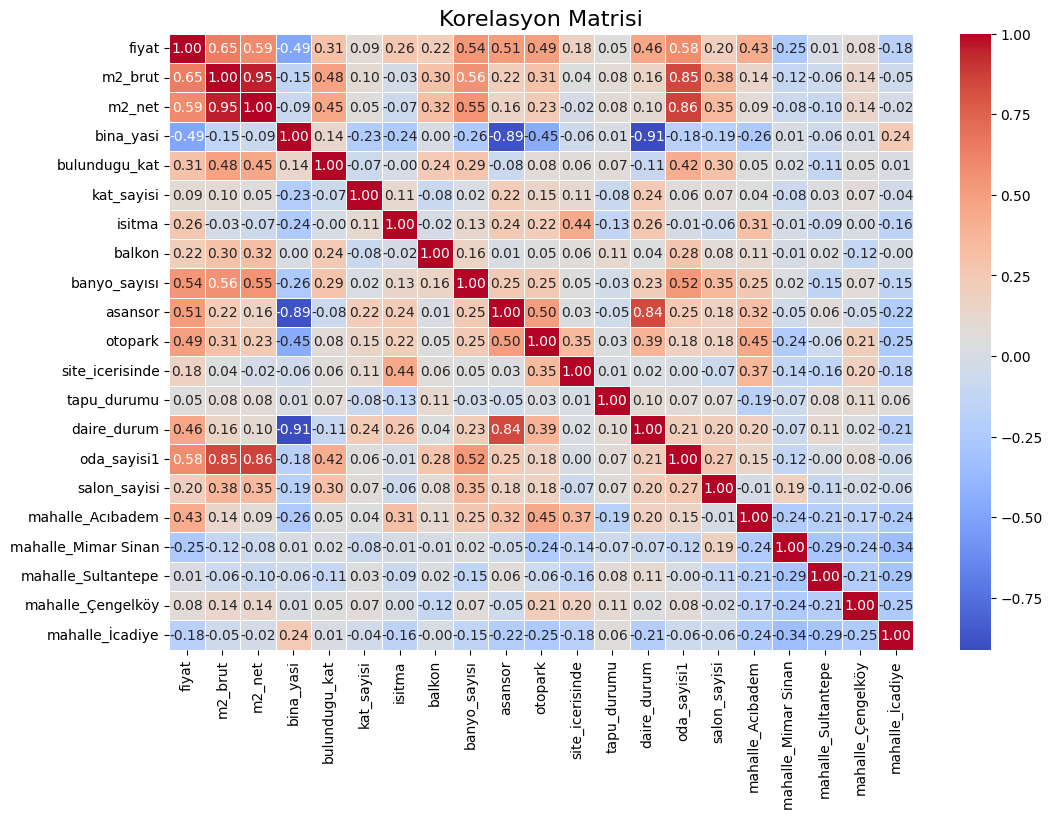

In [ ]:
# Sayısal verileri seçme
numerical_cols = yz2_cleaned6.select_dtypes(include=['int64', 'float64']).columns

# Korelasyon matrisini hesaplama
corr_matrix = yz2_cleaned6[numerical_cols].corr()

# Korelasyon matrisini görselleştirme
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)

# Başlık
plt.title('Korelasyon Matrisi', fontsize=16)
plt.show()

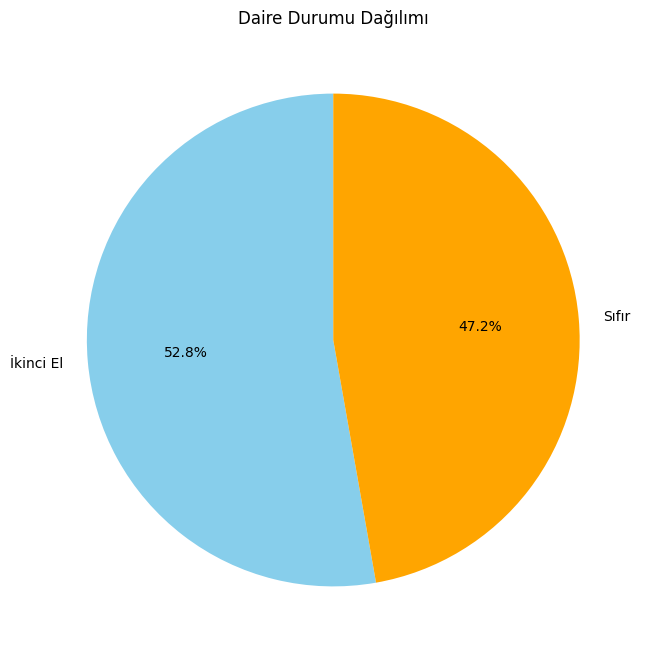

In [ ]:
plt.figure(figsize=(8, 8))
labels = ['İkinci El', 'Sıfır']
sizes = yz2_cleaned6['daire_durum'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title("Daire Durumu Dağılımı")
plt.show()

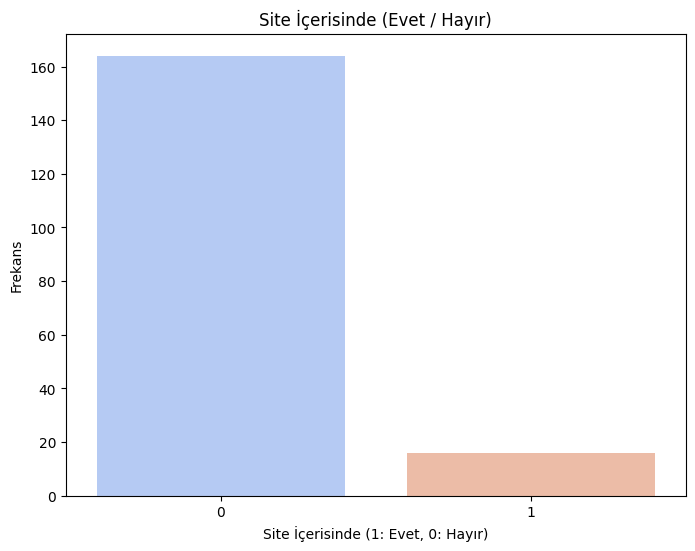

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='site_icerisinde', data=yz2_cleaned6, palette='coolwarm')
plt.title("Site İçerisinde (Evet / Hayır)")
plt.xlabel("Site İçerisinde (1: Evet, 0: Hayır)")
plt.ylabel("Frekans")
plt.show()

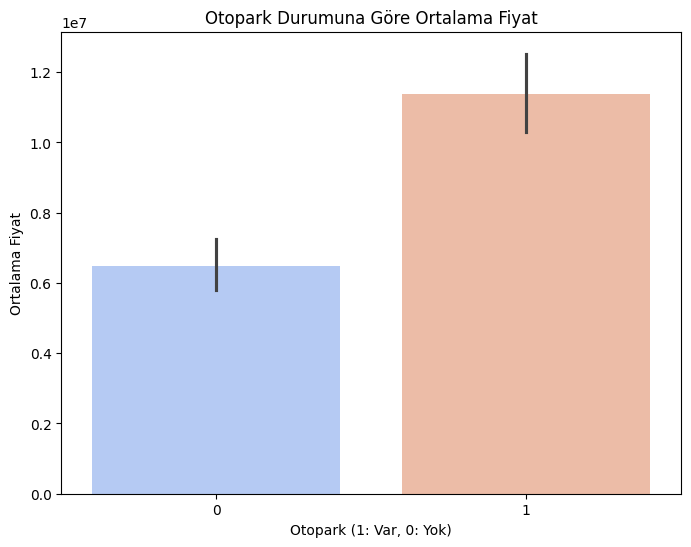

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='otopark', y='fiyat', data=yz2_cleaned6, palette='coolwarm')
plt.title("Otopark Durumuna Göre Ortalama Fiyat")
plt.xlabel("Otopark (1: Var, 0: Yok)")
plt.ylabel("Ortalama Fiyat")
plt.show()

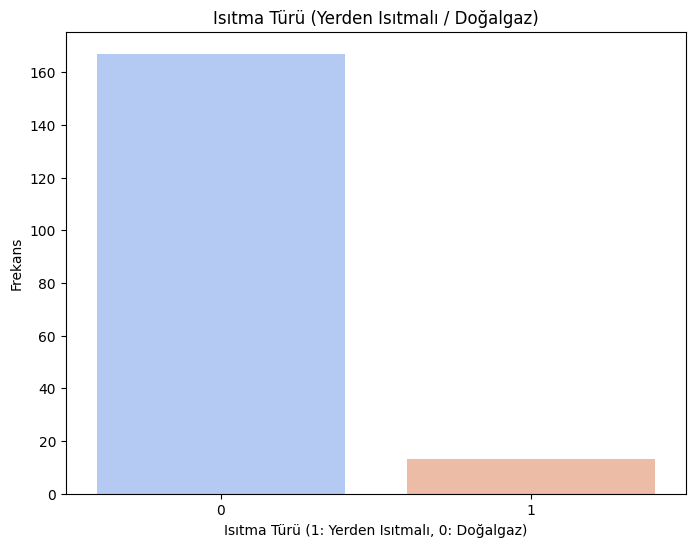

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='isitma', data=yz2_cleaned6, palette='coolwarm')
plt.title("Isıtma Türü (Yerden Isıtmalı / Doğalgaz)")
plt.xlabel("Isıtma Türü (1: Yerden Isıtmalı, 0: Doğalgaz)")
plt.ylabel("Frekans")
plt.show()

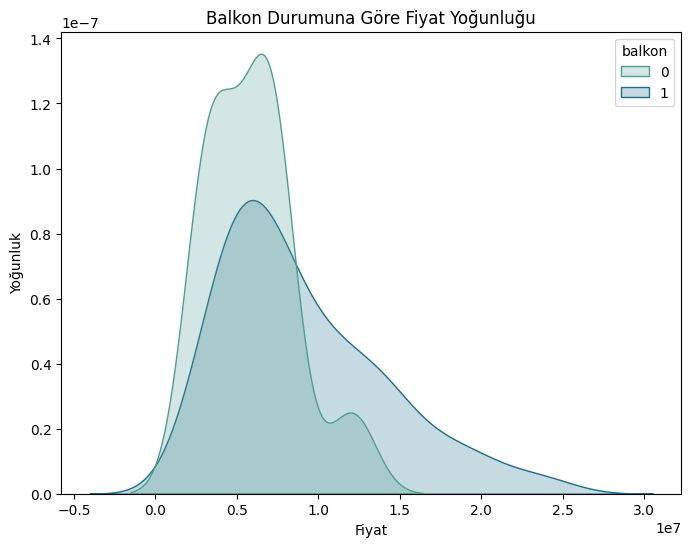

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=yz2_cleaned6, x='fiyat', hue='balkon', fill=True, common_norm=False, palette='crest')
plt.title("Balkon Durumuna Göre Fiyat Yoğunluğu")
plt.xlabel("Fiyat")
plt.ylabel("Yoğunluk")
plt.show()

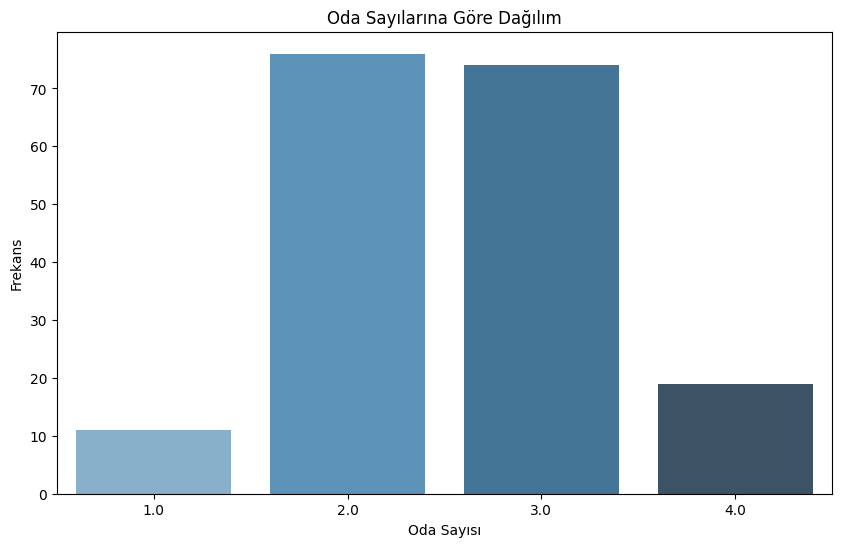

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=yz2_cleaned6, x='oda_sayisi1', palette='Blues_d')
plt.title("Oda Sayılarına Göre Dağılım")
plt.xlabel("Oda Sayısı")
plt.ylabel("Frekans")
plt.show()

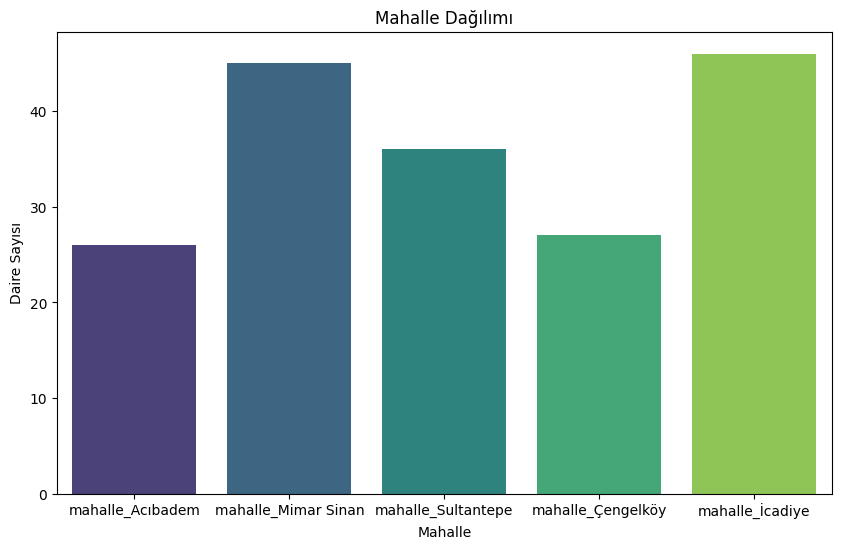

In [ ]:
mahalleler = ['mahalle_Acıbadem', 'mahalle_Mimar Sinan', 'mahalle_Sultantepe', 'mahalle_Çengelköy', 'mahalle_İcadiye']
mahalle_siklik = yz2_cleaned6[mahalleler].sum()
plt.figure(figsize=(10,6))
sns.barplot(x=mahalle_siklik.index, y=mahalle_siklik.values, palette='viridis')
plt.title("Mahalle Dağılımı")
plt.xlabel("Mahalle")
plt.ylabel("Daire Sayısı")
plt.show()

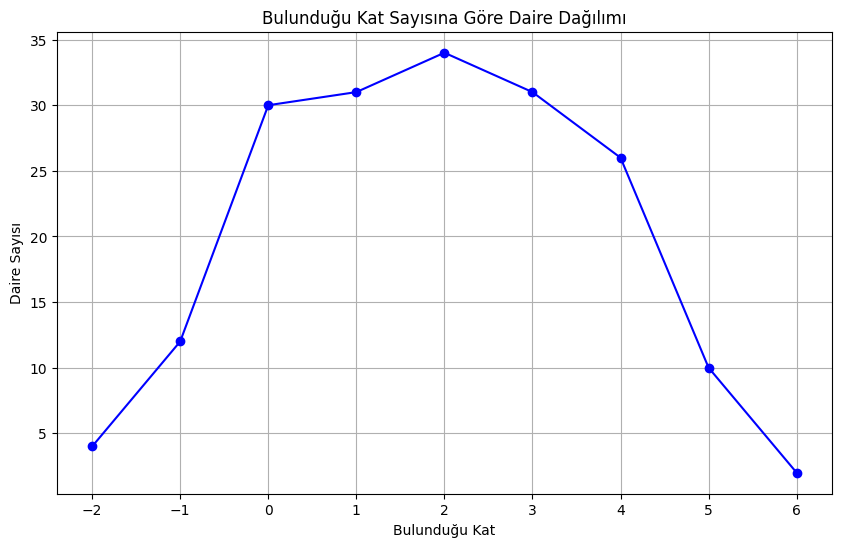

In [ ]:
kat_sayisi = yz2_cleaned6['bulundugu_kat'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(kat_sayisi.index, kat_sayisi.values, marker='o', linestyle='-', color='b')
plt.title("Bulunduğu Kat Sayısına Göre Daire Dağılımı")
plt.xlabel("Bulunduğu Kat")
plt.ylabel("Daire Sayısı")
plt.grid(True)
plt.show()


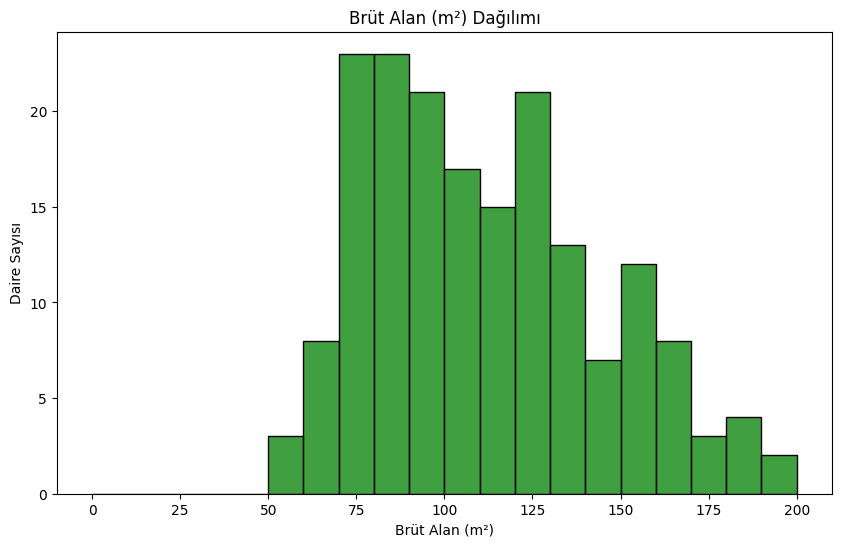

In [ ]:
plt.figure(figsize=(10, 6))
bins = np.arange(0, yz2_cleaned6['m2_brut'].max() + 10, 10)
sns.histplot(data=yz2_cleaned6, x='m2_brut', bins=bins, kde=False, color='green')
plt.title("Brüt Alan (m²) Dağılımı")
plt.xlabel("Brüt Alan (m²)")
plt.ylabel("Daire Sayısı")
plt.show()

In [ ]:
selected_columns = ['fiyat','asansor','otopark','isitma','daire_durum']

yz2_degisken_secimi = yz2_cleaned6[selected_columns]
yz2_degisken_secimi.to_csv('yz_degisken_secimi_son.csv', index=False)
print(yz2_degisken_secimi)

        fiyat  asansor  otopark  isitma  daire_durum
0     3300000        0        0       0            0
1     5500000        0        0       0            0
3     5350000        1        0       1            1
5    10500000        1        0       0            1
6    10950000        1        1       0            1
..        ...      ...      ...     ...          ...
243   7750000        1        0       0            1
244   6000000        0        0       0            0
246   2850000        0        0       0            0
247  11000000        1        1       0            1
249  11950000        1        1       0            1

[180 rows x 5 columns]


Accuracy: 0.8611111111
Precision: 0.8630890953
Recall: 0.8611111111
F1-Score: 0.8614348614
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        20
           1       0.82      0.88      0.85        16

    accuracy                           0.86        36
   macro avg       0.86      0.86      0.86        36
weighted avg       0.86      0.86      0.86        36



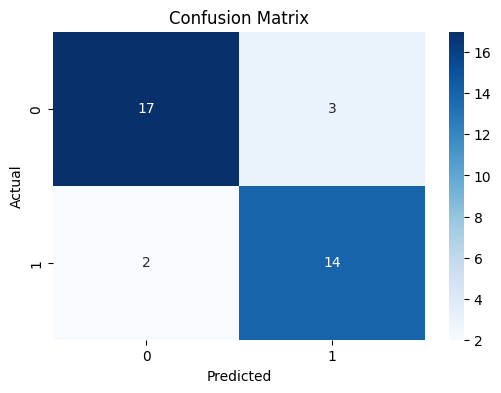

Eğitim Doğruluğu: 0.9791666667
Eğitim ve Test Doğruluğu Arasındaki Fark: 0.1180555556


In [ ]:
# Karar AGACI
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, classification_report,confusion_matrix
X = yz2_degisken_secimi[['fiyat', 'asansor','isitma','otopark']]
y = yz2_degisken_secimi['daire_durum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.10f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.10f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.10f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.10f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


train_accuracy = accuracy_score(y_train, model.predict(X_train))
print("Eğitim Doğruluğu: {:.10f}".format(train_accuracy))
accuracy_difference = train_accuracy - accuracy
print("Eğitim ve Test Doğruluğu Arasındaki Fark: {:.10f}".format(accuracy_difference))

Accuracy: 0.9166666667
Precision: 0.9298245614
Recall: 0.9166666667
F1-Score: 0.9168597169
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        20
           1       0.84      1.00      0.91        16

    accuracy                           0.92        36
   macro avg       0.92      0.93      0.92        36
weighted avg       0.93      0.92      0.92        36



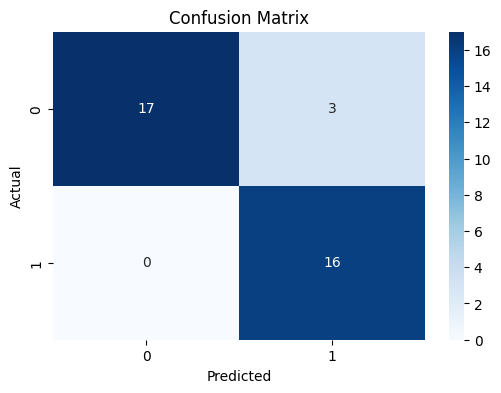

In [ ]:
# LOJİSTİK REGRESYON
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)

# Modeli eğitim verisi üzerinde eğitme
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Doğruluk (accuracy) hesaplama
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.10f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.10f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.10f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.10f}")

# Sınıflandırma raporu (Precision, Recall, F1-Score vb.)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.6667
Precision: 0.7564
Recall: 0.6667
F1-Score: 0.6508
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.45      0.60        20
           1       0.58      0.94      0.71        16

    accuracy                           0.67        36
   macro avg       0.74      0.69      0.66        36
weighted avg       0.76      0.67      0.65        36



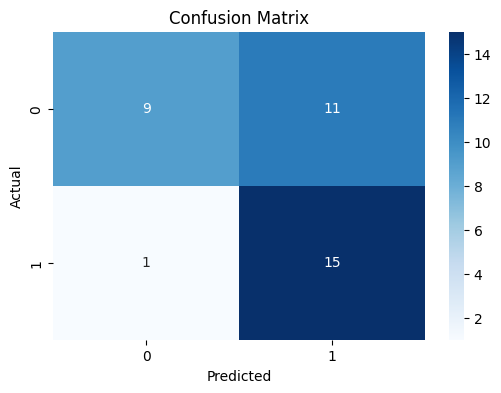

In [ ]:
#SVM
from sklearn.svm import SVC
model_svm = SVC(random_state=42)

# Modeli eğitim verisi üzerinde eğitme
model_svm.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = model_svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

# Sınıflandırma raporu (Precision, Recall, F1-Score vb.)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



Accuracy: 0.7222
Precision: 0.7215
Recall: 0.7222
F1-Score: 0.7196
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.71      0.62      0.67        16

    accuracy                           0.72        36
   macro avg       0.72      0.71      0.71        36
weighted avg       0.72      0.72      0.72        36



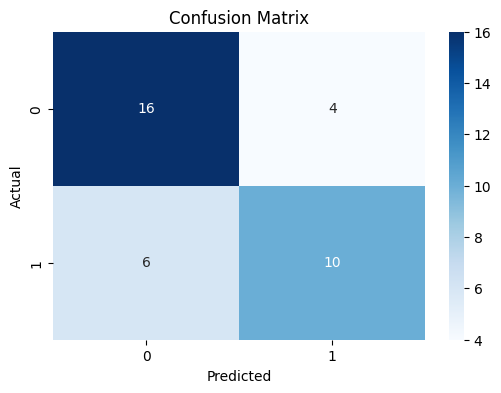

In [ ]:
#NAİVE BAYES
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

# Modeli eğitim verisi üzerinde eğitme
model_nb.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = model_nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

# Sınıflandırma raporu (Precision, Recall, F1-Score vb.)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.5833
Precision: 0.6626
Recall: 0.5833
F1-Score: 0.5576
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.35      0.48        20
           1       0.52      0.88      0.65        16

    accuracy                           0.58        36
   macro avg       0.65      0.61      0.57        36
weighted avg       0.66      0.58      0.56        36



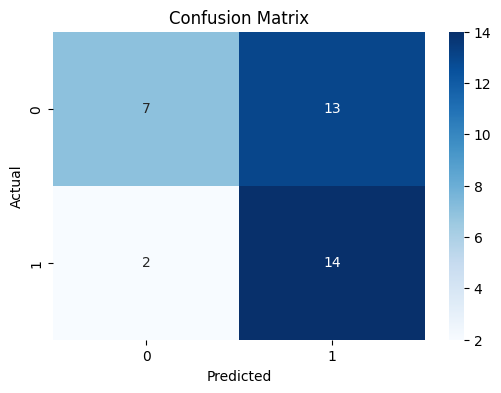

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=5)  # Burada k = 5 olarak belirlenmiştir

# Modeli eğitim verisi üzerinde eğitme
model_knn.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred = model_knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

# Sınıflandırma raporu (Precision, Recall, F1-Score vb.)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Accuracy: 0.8611111111
Precision: 0.8630890953
Recall: 0.8611111111
F1-Score: 0.8614348614
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.35      0.48        20
           1       0.52      0.88      0.65        16

    accuracy                           0.58        36
   macro avg       0.65      0.61      0.57        36
weighted avg       0.66      0.58      0.56        36



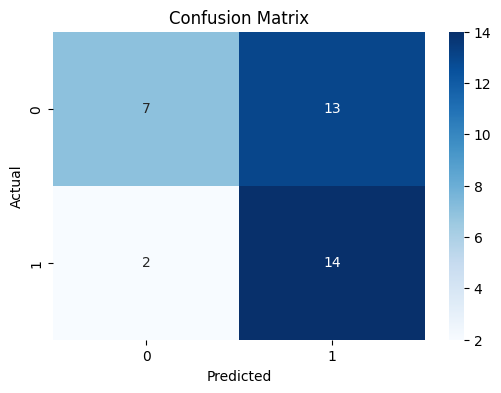

In [ ]:
#RASTGELE ORMANLAR
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy:.10f}")
precision = precision_score(y_test, y_pred_rf, average='weighted')
print(f"Precision: {precision:.10f}")
recall = recall_score(y_test, y_pred_rf, average='weighted')
print(f"Recall: {recall:.10f}")
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1-Score: {f1:.10f}")

# Sınıflandırma raporu (Precision, Recall, F1-Score vb.)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

